In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
from parsingBinary import *

In [67]:
numCh = 1
ch = 0
sogliola = 160

%matplotlib inline

In [68]:
# Funzione gaussiana
def Gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

# Funzione che fa i fit e tutto quanto il resto
def fittaCose(nRun, sogliola = 230, sigma_left= 2, sigma_right = 2 , nbin = 8192, plotta = True):
    
    #Apro i dati
    data = openBinary(nRun, numCh)

    # Istogrammo i dati
    
    vect = data["ch_data"]["lg_pha"]
    h, bins = np.histogram(vect, range = (0, 8192), bins = nbin)
    binc = bins[:-1] + (bins[1]-bins[0])/2

    # Calcolo media, massimo e deviazione standard dei dati dopo la soglia

    a = np.max(vect[vect>sogliola])
    mu = np.mean(vect[vect>sogliola])
    sigma = np.std(vect[vect>sogliola])
    
    fpara = [a,mu,sigma]
    
    # Preparo i dati da fittare

    # Prendo i dati entro tot sigma dal picco
    logico1 = (binc>mu-sigma_left*sigma) & (binc<mu+sigma_right*sigma) 
    # Prendo i dati maggiori della sogliola e minori di 7977 (gli ultimi bin sono un po' problematici quando saturiamo)
    logico2 = (binc>sogliola)  & (binc<7977)

    logico = logico1 & logico2


    x_fit = binc[logico]
    y_fit = h[logico]
    
    # Fitto   

    oP, pC = opt.curve_fit(Gauss, x_fit, y_fit, sigma = np.sqrt(y_fit), p0 = fpara)
    if plotta:

        fig, ax = plt.subplots()
        fig.set_size_inches(12, 6)
        fig.suptitle(f"Run {nRun} - LG")

        # Li plotto
        ax.plot(binc, h, ds = "steps-mid", label = 'Data')
        ax.plot(x_fit, y_fit,  ds = "steps-mid", label = 'Data to fit')
        ax.axvline(sogliola, c = 'gray', ls = '--')

        ax.axvline(mu, ls = '--', c = 'hotpink', label = 'Mean')


    
        ax.plot(x_fit, Gauss(x_fit, *oP), label = "Fit ", c = 'black', ls = '--')
        ax.plot(oP[1], Gauss(oP[1],*oP), '*', label = f"mu = {oP[1]:.2f}", c = 'lime', ms = 11)
        ax.set_xlabel("Energy [ADC]")
        ax.set_ylabel("Counts")
        ax.set_title(f"CH{ch}")
        ax.set_yscale("log")
        ax.grid()
        ax.set_xlim(0,mu+5*sigma)
        ax.legend()
        
        plt.show()
        
    oP_list.append(oP)
    pC_list.append(pC)
    offset.append(np.max(vect[vect<sogliola]))
    media_list.append(mu)
    media_err_list.append(np.sqrt((sigma/np.sqrt(len(vect))**2+(np.sqrt(np.max(vect[vect<sogliola])))**2)))
    return 



In [69]:
do_list_tarocca = [3.9, 3.6, 3.3, 3, 2.7, 2.4, 2.5, 2.2, 2, 2.1, 1.8, 1.7, 2, 1.8]
do_list = [3.9, 3.6, 3.3, 3, 2.7, 2.4, 2.5, 2.2, 2, 2.1, 1.9, 1.8, 2, 1.9]
nRun_list = [1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169]



c:\Users\utente\Documents\00 - g\Uni\Lab\SiPMFERS_2023\AnalisiLaser\parsingBinary.py:78: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  1: np.dtype(


Text(0, 0.5, 'Counts')

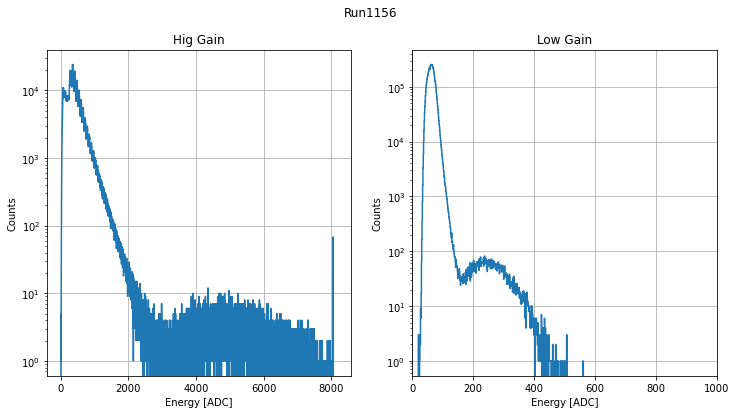

In [70]:
#Apro i dati
data = openBinary(1156, numCh)

# Istogrammo i dati

vect = data["ch_data"]["lg_pha"]
h_lg, bins = np.histogram(vect, range = (0, 8192), bins = 8192)
binc_lg = bins[:-1] + (bins[1]-bins[0])/2

vect = data["ch_data"]["hg_pha"]
h_hg, bins = np.histogram(vect, range = (0, 8192), bins = 8192)
binc_hg = bins[:-1] + (bins[1]-bins[0])/2

fig, ax = plt.subplots(1,2, figsize = (12, 6))

fig.suptitle('Run1156')

ax[0].plot(binc_hg, h_hg, ds = 'steps-mid')
ax[0].set_title('Hig Gain')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].set_xlabel("Energy [ADC]")
ax[0].set_ylabel("Counts")

ax[1].plot(binc_lg, h_lg, ds = 'steps-mid')
ax[1].set_title('Low Gain')
ax[1].set_yscale('log')
ax[1].grid()
ax[1].set_xlim(0,1000)
ax[1].set_xlabel("Energy [ADC]")
ax[1].set_ylabel("Counts")

Parametri del fit:
  --> mu1 = 279.69 ± 0.10 , mu2 = 348.36 ± 0.06, mu3 = 414.97 ± 0.08
  --> mu2-mu1 = 68.67 ± 0.12; mu3-mu2 = 66.61 ± 0.10
67.71319620829865


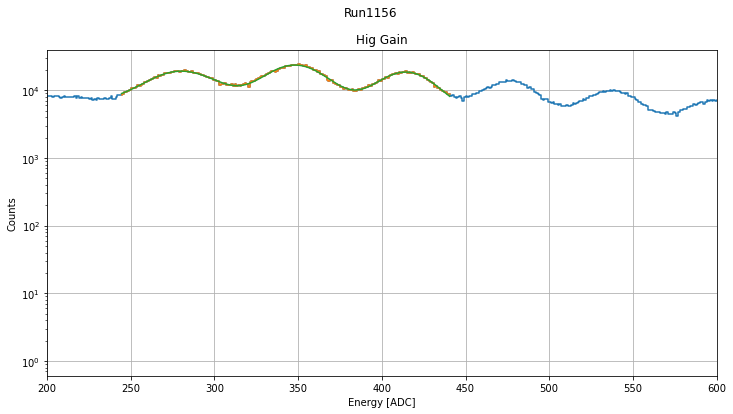

In [71]:

def gaus4(x, a1,a2,a3,a4, mu1,mu2,mu3, mu4, sigma1,sigma2,sigma3, sigma4):
    y =  a1*np.exp(-(x-mu1)**2/(2*sigma1**2)) +a2*np.exp(-(x-mu2)**2/(2*sigma2**2)) + a3*np.exp(-(x-mu3)**2/(2*sigma3**2)) + a4*np.exp(-(x-mu4)**2/(2*sigma4**2)) 
    return y

x_fit = binc_hg[(binc_hg > 244) & (binc_hg < 441)]
y_fit = h_hg[(binc_hg > 244) & (binc_hg < 441)]

fpara = [19000-7000, 23500-7000, 18500-7000, 7000,
         278, 345, 410, 200,
         20, 20, 20, 400]

fig, ax = plt.subplots(figsize = (12, 6))

fig.suptitle('Run1156')

ax.plot(binc_hg, h_hg, ds = 'steps-mid', label = 'Data')
ax.plot(x_fit, y_fit, ds = 'steps-mid', label = 'Data to fit')
#ax.plot(x_fit, gaus4(x_fit, *fpara))
oP, pC = opt.curve_fit(gaus4, x_fit, y_fit, sigma=np.sqrt(y_fit), absolute_sigma=True, p0 = fpara)
ax.plot(x_fit, gaus4(x_fit, *oP), label  = 'Fit')
ax.set_title('Hig Gain')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("Energy [ADC]")
ax.set_ylabel("Counts")
ax.set_xlim(200,600)

mu21 = oP[5]-oP[4] 
err_mu21 = np.sqrt(np.diag(pC)[5]+np.diag(pC)[4])
mu32 = oP[6]-oP[5] 
err_mu32 = np.sqrt(np.diag(pC)[6]+np.diag(pC)[5])
print('Parametri del fit:')
print(f"  --> mu1 = {oP[4]:.2f} ± {np.sqrt(np.diag(pC))[4]:.2f} , mu2 = {oP[5]:.2f} ± {np.sqrt(np.diag(pC))[5]:.2f}, mu3 = {oP[6]:.2f} ± {np.sqrt(np.diag(pC))[6]:.2f}")
print(f"  --> mu2-mu1 = {mu21:.2f} ± {err_mu21:.2f}; mu3-mu2 = {mu32:.2f} ± {err_mu32:.2f}")

delta_mu = np.average([mu21, mu32], weights = [err_mu21, err_mu32])
print(delta_mu)




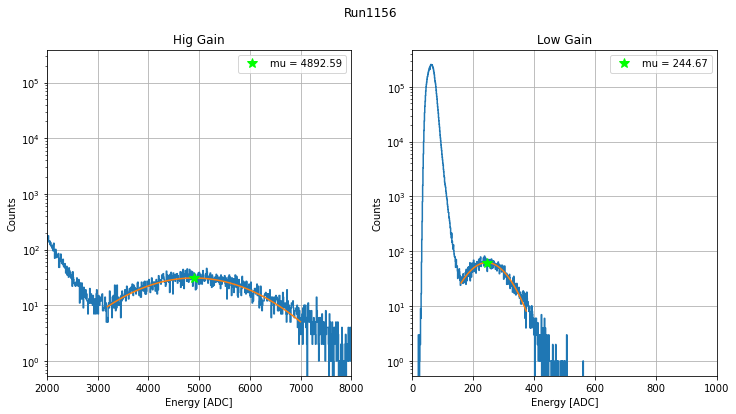

In [79]:
fig, ax = plt.subplots(1,2, figsize = (12, 6))

fig.suptitle('Run1156')

vect = data["ch_data"]["hg_pha"]
h_hg, bins = np.histogram(vect, range = (0, 8192), bins = 900)
binc_hg = bins[:-1] + (bins[1]-bins[0])/2

x_fit = binc_hg[(binc_hg > 3.19e03) & (binc_hg < 7e03)]
y_fit = h_hg[(binc_hg > 3.19e03) & (binc_hg < 7e03)]

a = np.max(vect[vect>3.19e03])
mu = np.mean(vect[vect>3.19e03])
sigma = np.std(vect[vect>3.19e03])

fpara = [a,mu,sigma]
oP, pC = opt.curve_fit(Gauss, x_fit, y_fit, sigma = np.sqrt(y_fit), p0 = fpara)

ax[0].plot(binc_hg, h_hg, ds = 'steps-mid')
ax[0].plot(x_fit, Gauss(x_fit, *oP))
ax[0].plot(oP[1], Gauss(oP[1],*oP), '*', label = f"mu = {oP[1]:.2f}", c = 'lime', ms = 11)
ax[0].set_title('Hig Gain')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].set_xlabel("Energy [ADC]")
ax[0].set_ylabel("Counts")
ax[0].set_xlim(2000,8000)
ax[0].legend()

mu_hg = oP[1]
mu_hg_err = np.sqrt(np.diag(pC)[1])

n_ph_hg = mu_hg/delta_mu

ax[1].plot(binc_lg, h_lg, ds = 'steps-mid')


vect = data["ch_data"]["lg_pha"]
h_lg, bins = np.histogram(vect, range = (0, 8192), bins = 8192)
binc_lg = bins[:-1] + (bins[1]-bins[0])/2

a = np.max(vect[vect>sogliola])
mu = np.mean(vect[vect>sogliola])
sigma = np.std(vect[vect>sogliola])

fpara = [a,mu,sigma]
x_fit = binc_lg[(binc_lg > sogliola) & (binc_lg < mu+2*sigma)]
y_fit = h_lg[(binc_lg > sogliola) & (binc_lg < mu+2*sigma)]


oP, pC = opt.curve_fit(Gauss, x_fit, y_fit, sigma = np.sqrt(y_fit), p0 = fpara)

ax[1].plot(x_fit, Gauss(x_fit, *oP))
ax[1].plot(oP[1], Gauss(oP[1],*oP), '*', label = f"mu = {oP[1]:.2f}", c = 'lime', ms = 11)

ax[1].set_title('Low Gain')
ax[1].set_yscale('log')
ax[1].grid()
ax[1].set_xlim(0,1000)
ax[1].set_xlabel("Energy [ADC]")
ax[1].set_ylabel("Counts")
ax[1].legend()

adc2ph = n_ph_hg/oP[1]

In [73]:

media_list = []
media_err_list = []
oP_list = []
pC_list = []
offset = []

Plottiamo = False

# Run1156, DO 3.9
fittaCose(nRun_list[0],sogliola = 160, plotta = Plottiamo)

# Run1157, DO  3.6
fittaCose(nRun_list[1],sogliola = 170, plotta = Plottiamo)

# Run1158, DO 3.3
fittaCose(nRun_list[2], plotta = Plottiamo)

# Run1159, DO 3
fittaCose(nRun_list[3], plotta = Plottiamo)

# Run1160, DO 2.7
fittaCose(nRun_list[4], nbin = 4000, plotta = Plottiamo)

# Run1161, DO 2.4
fittaCose(nRun_list[5], nbin = 4000, plotta = Plottiamo)

# Run1162, DO 2.5
fittaCose(nRun_list[6], nbin = 2000, plotta = Plottiamo)

# Run1163, DO 2.2
fittaCose(nRun_list[7], nbin = 1500, sigma_left = 0.5, plotta = Plottiamo)

# Run1164, DO 2
fittaCose(nRun_list[8], nbin = 1500, sigma_left = 0.5, plotta = Plottiamo)

# Run1165, DO 2.1
fittaCose(nRun_list[9], nbin = 1500, sigma_left = 0.2, plotta = Plottiamo)

# Run1166, DO 1.9
fittaCose(nRun_list[10], nbin = 1000, sigma_left =0, sigma_right =1.6, plotta = Plottiamo)


# Run1167, DO 1.8 -- saturazione
fittaCose(nRun_list[11], nbin = 1000, sigma_left = -0.1, sigma_right =1.5, plotta = Plottiamo)

# Run1168, DO 2
fittaCose(nRun_list[12], nbin = 1000, sigma_left = 0, sigma_right = 1.6, plotta = Plottiamo)


# Run1169, DO 1.9
fittaCose(nRun_list[13], nbin = 1000, sigma_left = 0, sigma_right = 1.6, plotta = Plottiamo)


mu = np.array([oP_list[i][1]-offset[i] for i in range(len(oP_list))])
err_mu = np.array([np.sqrt(np.diag(pC_list[i]))[1] for i in range(len(pC_list))])

media = np.array([media_list[i]-offset[i] for i in range(len(media_list))])
media_err = np.sqrt(np.array(media_err_list)**2+np.array(offset))

c:\Users\utente\Documents\00 - g\Uni\Lab\SiPMFERS_2023\AnalisiLaser\parsingBinary.py:78: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  1: np.dtype(


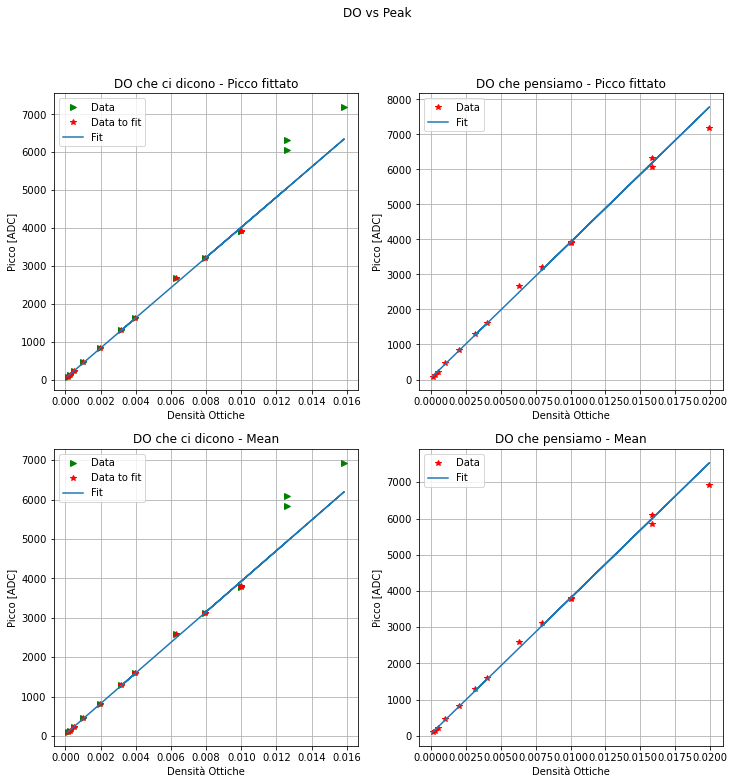

In [74]:
def myLine(x, m, q):
    return m*x+q

# Plottiamo

do = 10**(-1*np.array(do_list)) # Sono do?
do_tarocche = 10**(-1*np.array(do_list_tarocca))

logi = np.array(do_list)>=2

x_fit = do[logi]
y_fit = mu[logi]

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu[np.array(do_list)>=2])


fig, ax = plt.subplots(2,2)
ax = ax.flatten()
fig.set_size_inches(12, 12)
fig.suptitle("DO vs Peak")

ax[0].plot(do, mu, '>', label = 'Data', color = 'green')
ax[0].plot(x_fit, y_fit,'*', label = 'Data to fit', color = 'red')
ax[0].plot(do, myLine(do, *oP), label ='Fit', color = 'tab:blue')
ax[0].set_xlabel('Densità Ottiche')
ax[0].set_ylabel('Picco [ADC]')
ax[0].grid()
ax[0].legend()
ax[0].set_title("DO che ci dicono - Picco fittato")

x_fit = do_tarocche
y_fit = mu

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu)


ax[1].plot(do_tarocche, mu, '*', label = 'Data', color = 'red')
ax[1].plot(do_tarocche, myLine(do_tarocche, *oP), label = 'Fit', color = 'tab:blue')
ax[1].set_xlabel('Densità Ottiche')
ax[1].set_ylabel('Picco [ADC]')
ax[1].grid()
ax[1].legend()
ax[1].set_title("DO che pensiamo - Picco fittato")

x_fit = do[logi]
y_fit = media[logi]

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu[np.array(do_list)>=2])


ax[2].plot(do, media, '>', label = 'Data', color = 'green')
ax[2].plot(x_fit, y_fit, '*', label = 'Data to fit', color = 'red')
ax[2].plot(do, myLine(do, *oP), label = 'Fit', color = 'tab:blue')
ax[2].set_xlabel('Densità Ottiche')
ax[2].set_ylabel('Picco [ADC]')
ax[2].grid()
ax[2].legend()
ax[2].set_title("DO che ci dicono - Mean")

x_fit = do_tarocche
y_fit = media

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu)

ax[3].plot(do_tarocche, media, '*', label = 'Data', color = 'red')
ax[3].plot(do_tarocche, myLine(do_tarocche, *oP), label = 'Fit', color = 'tab:blue')
ax[3].set_xlabel('Densità Ottiche')
ax[3].set_ylabel('Picco [ADC]')
ax[3].grid()
ax[3].legend()
ax[3].set_title("DO che pensiamo - Mean")

plt.show()

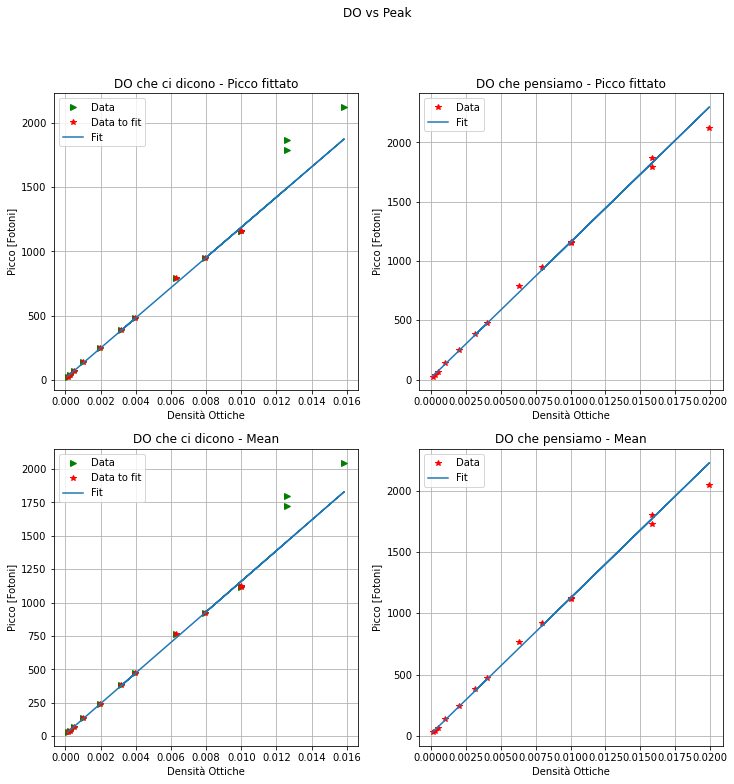

In [76]:

x_fit = do[logi]
y_fit = mu[logi]

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu[np.array(do_list)>=2])


fig, ax = plt.subplots(2,2)
ax = ax.flatten()
fig.set_size_inches(12, 12)
fig.suptitle("DO vs Peak")

ax[0].plot(do, mu*adc2ph, '>', label = 'Data', color = 'green')
ax[0].plot(x_fit, y_fit*adc2ph,'*', label = 'Data to fit', color = 'red')
ax[0].plot(do, myLine(do, *oP)*adc2ph, label ='Fit', color = 'tab:blue')
ax[0].set_xlabel('Densità Ottiche')
ax[0].set_ylabel('Picco [Fotoni]')
ax[0].grid()
ax[0].legend()
ax[0].set_title("DO che ci dicono - Picco fittato")

x_fit = do_tarocche
y_fit = mu

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu)


ax[1].plot(do_tarocche, mu*adc2ph, '*', label = 'Data', color = 'red')
ax[1].plot(do_tarocche, myLine(do_tarocche, *oP)*adc2ph, label = 'Fit', color = 'tab:blue')
ax[1].set_xlabel('Densità Ottiche')
ax[1].set_ylabel('Picco [Fotoni]')
ax[1].grid()
ax[1].legend()
ax[1].set_title("DO che pensiamo - Picco fittato")

x_fit = do[logi]
y_fit = media[logi]

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu[np.array(do_list)>=2])


ax[2].plot(do, media*adc2ph, '>', label = 'Data', color = 'green')
ax[2].plot(x_fit, y_fit*adc2ph, '*', label = 'Data to fit', color = 'red')
ax[2].plot(do, myLine(do, *oP)*adc2ph, label = 'Fit', color = 'tab:blue')
ax[2].set_xlabel('Densità Ottiche')
ax[2].set_ylabel('Picco [Fotoni]')
ax[2].grid()
ax[2].legend()
ax[2].set_title("DO che ci dicono - Mean")

x_fit = do_tarocche
y_fit = media

oP, pC = opt.curve_fit(myLine,x_fit, y_fit, sigma = err_mu)

ax[3].plot(do_tarocche, media*adc2ph, '*', label = 'Data', color = 'red')
ax[3].plot(do_tarocche, myLine(do_tarocche, *oP)*adc2ph, label = 'Fit', color = 'tab:blue')
ax[3].set_xlabel('Densità Ottiche')
ax[3].set_ylabel('Picco [Fotoni]')
ax[3].grid()
ax[3].legend()
ax[3].set_title("DO che pensiamo - Mean")

plt.show()